Project: Capstone Project - Inferential Statistics 2 - 6 Hours

At this point, you have obtained the data set for your Capstone project, cleaned and wrangled it into a form that's ready for analysis. It's now time to apply the inferential statistics techniques you have learned to explore the data. For example, are there variables that are particularly significant in terms of explaining the answer to your project question? Are there strong correlations between pairs of independent variables, or between an independent and a dependent variable? Submission: Write a short report (1-2 pages) on the inferential statistics steps you performed and your findings. Check this report into your github and submit a link to it. Eventually, this report can be incorporated into your Milestone report.

**Import necessary modules and the ASOS/SNOTEL dataframes**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dtb
import os
from glob import glob
import datetime as dt
import seaborn as sns

In [2]:
data = [pd.read_csv('asos_snotel_inter_clean_df.dat', parse_dates = True, index_col = 'Date_Time')]
asos_snotel_df= pd.concat(data)

asos_snotel_df = asos_snotel_df.interpolate(limit=3)

print(asos_snotel_df.head())


                     TOBS.I-1 (degC)   SNWD.I-1 (in)   Temperature_degC  \
Date_Time                                                                 
2006-01-01 01:00:00              -2.8            43.0              -1.0   
2006-01-01 02:00:00              -2.9            43.0              -3.0   
2006-01-01 03:00:00              -3.3            43.0              -4.0   
2006-01-01 04:00:00              -3.2            43.0              -4.0   
2006-01-01 05:00:00              -3.2            43.0              -5.0   

                     Dewpoint_degC  Pressure_hp  WindDirection_deg  \
Date_Time                                                            
2006-01-01 01:00:00           -7.0          NaN              220.0   
2006-01-01 02:00:00           -8.0          NaN              230.0   
2006-01-01 03:00:00           -8.0          NaN              230.0   
2006-01-01 04:00:00           -9.0          NaN              240.0   
2006-01-01 05:00:00           -8.0          NaN       

**Do some quick timeseries plots to visually see the data**

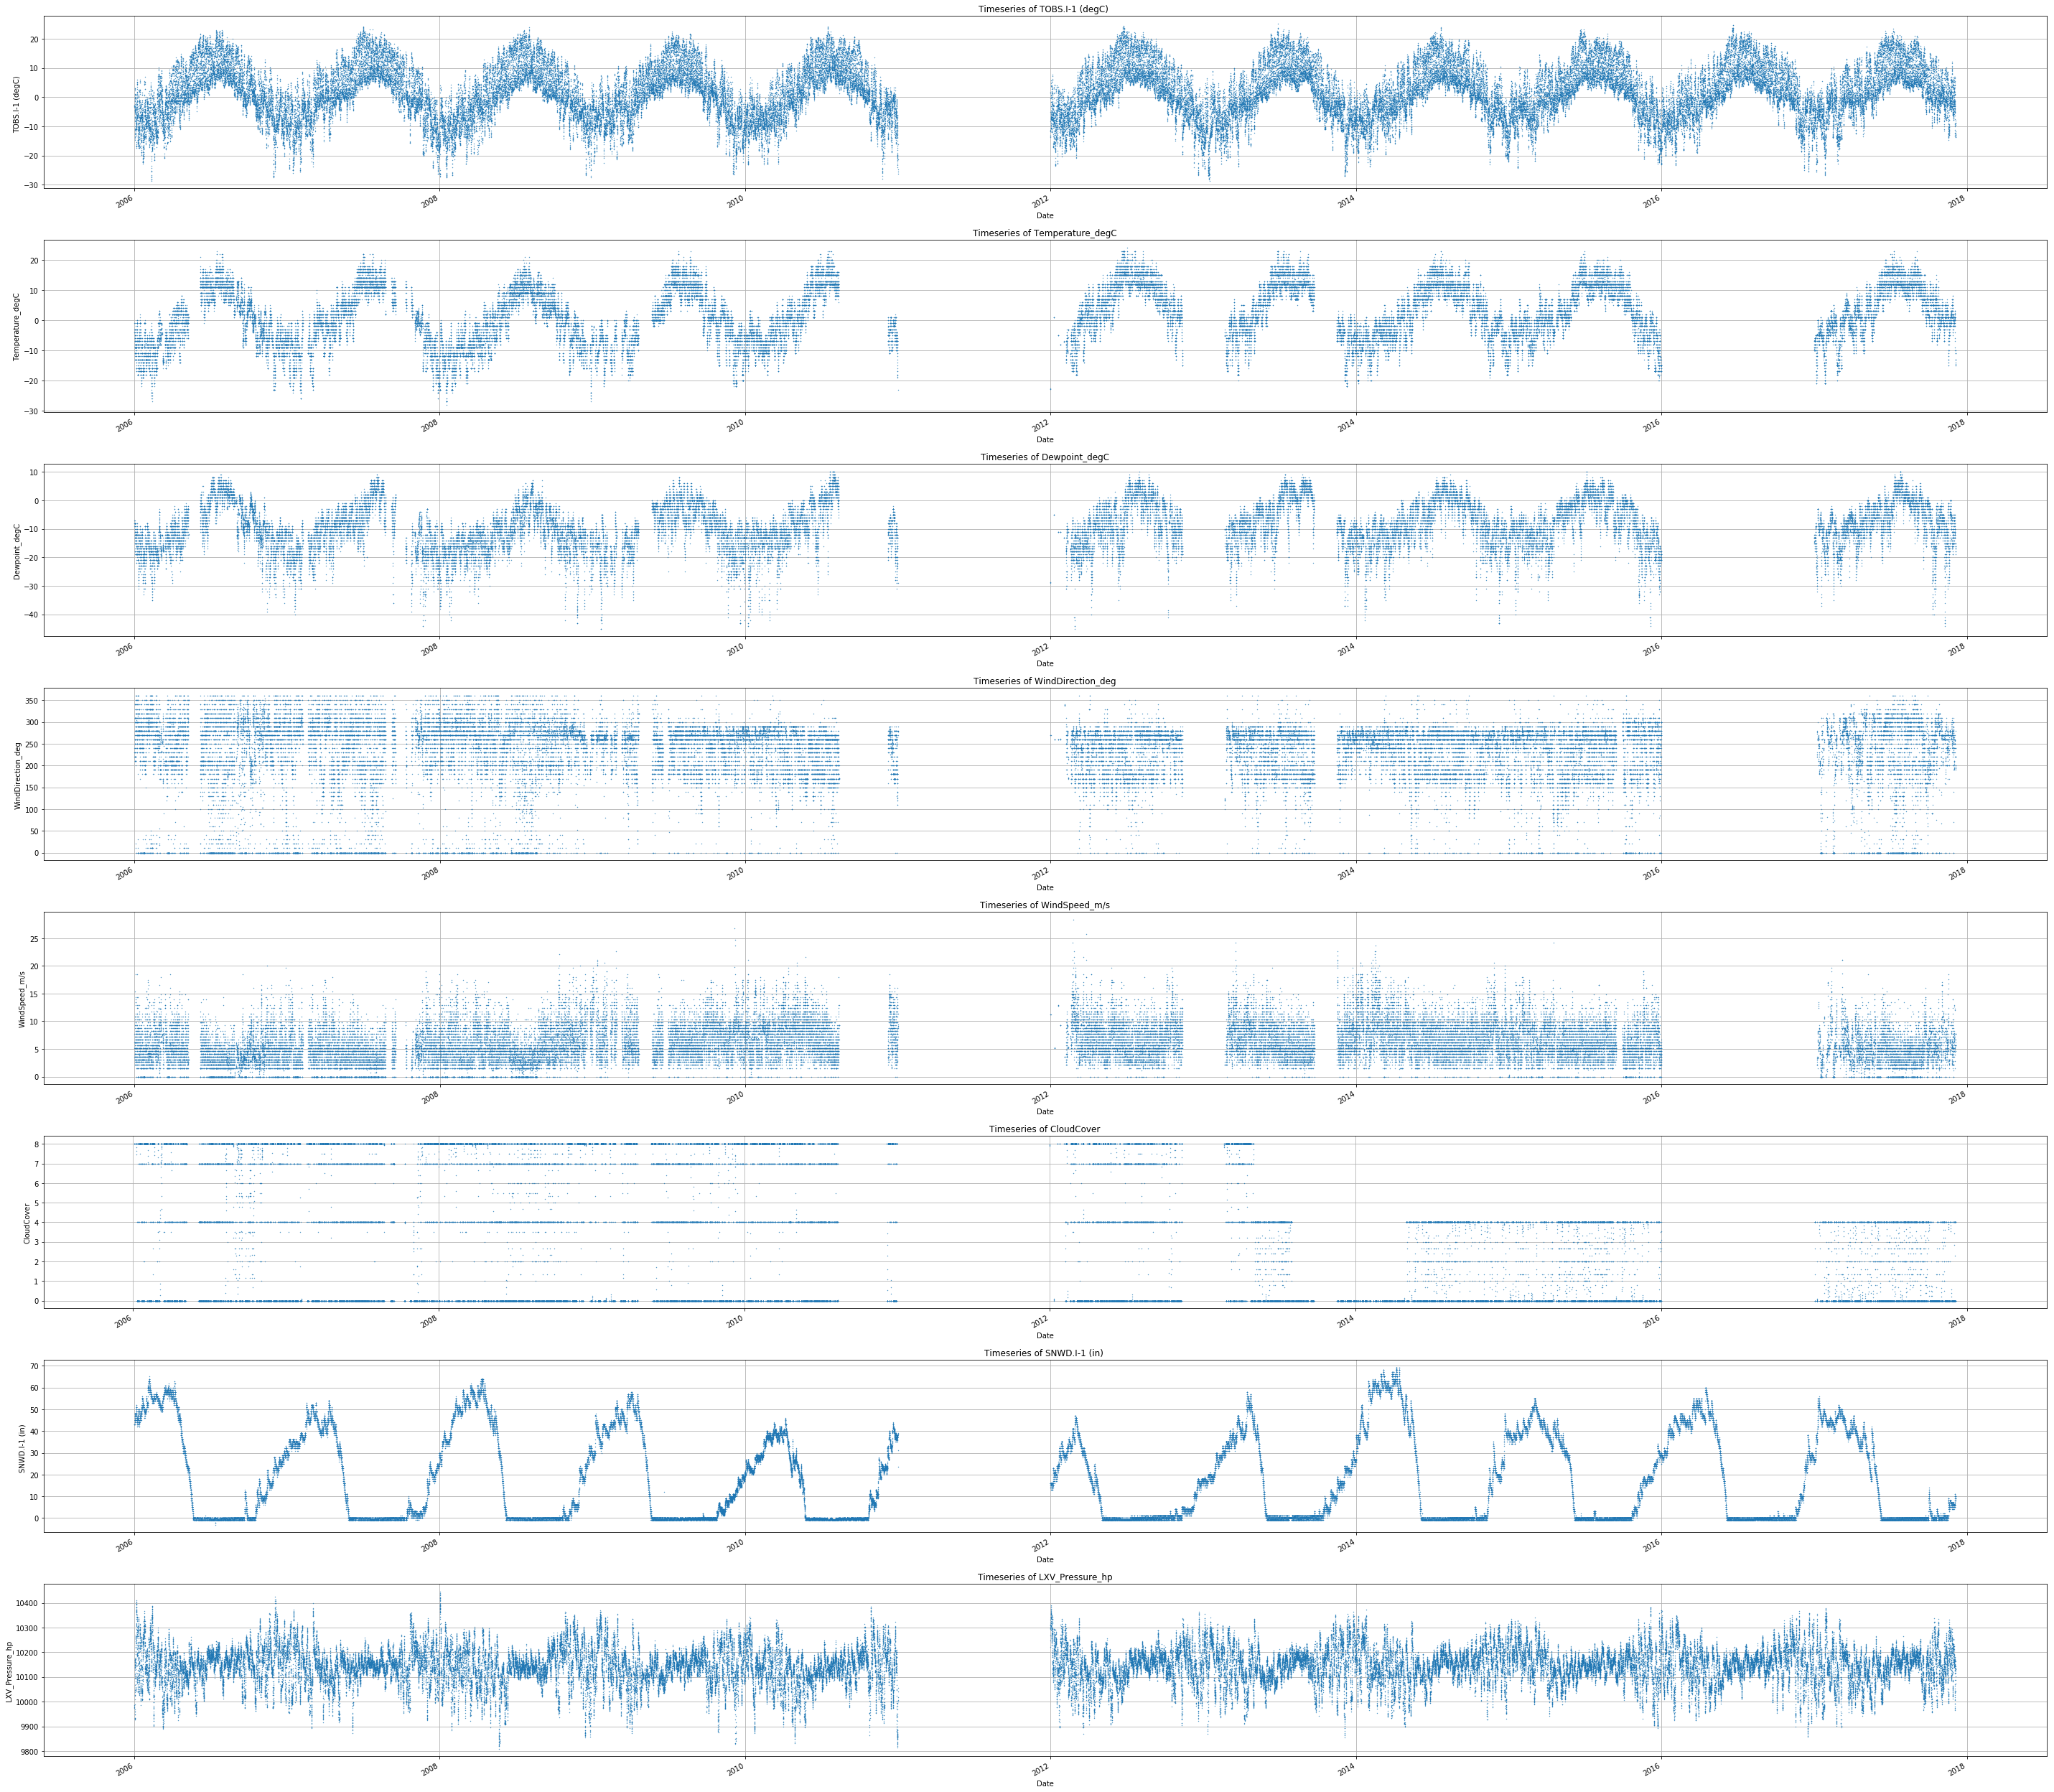

In [3]:
ax = None
keys = ['TOBS.I-1 (degC) ','Temperature_degC', 'Dewpoint_degC', 'WindDirection_deg', 'WindSpeed_m/s', 'CloudCover', 'SNWD.I-1 (in) ', 'LXV_Pressure_hp']

fig = plt.figure(figsize=(50,75))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
for k in range(len(keys)):
    ax = plt.subplot(12, 1, k+1)
    asos_snotel_df[keys[k]]['2005':'2017'].plot(linestyle='None', ax = ax, marker = ".", markersize = 0.75)
    ax.set_xlabel("Date")
    ax.set_ylabel(keys[k])
    
    plt.title("Timeseries of " + keys[k])
 
    plt.grid()
    plt.axis('tight')
  

plt.show()



** &#8657; Some notes:  
There is a a lot of missing data for year 2011 and 2016 - this should be kept in mind as it could skew some our analyeses slightly  
Cloud Cover - something strange happens during year 2013 - only values from 0-4 get reported.  Again, this should be taken into account. Perhaps remove these years altogether for any Cloud Cover analysis **



## Do Check for Normality using NormTest

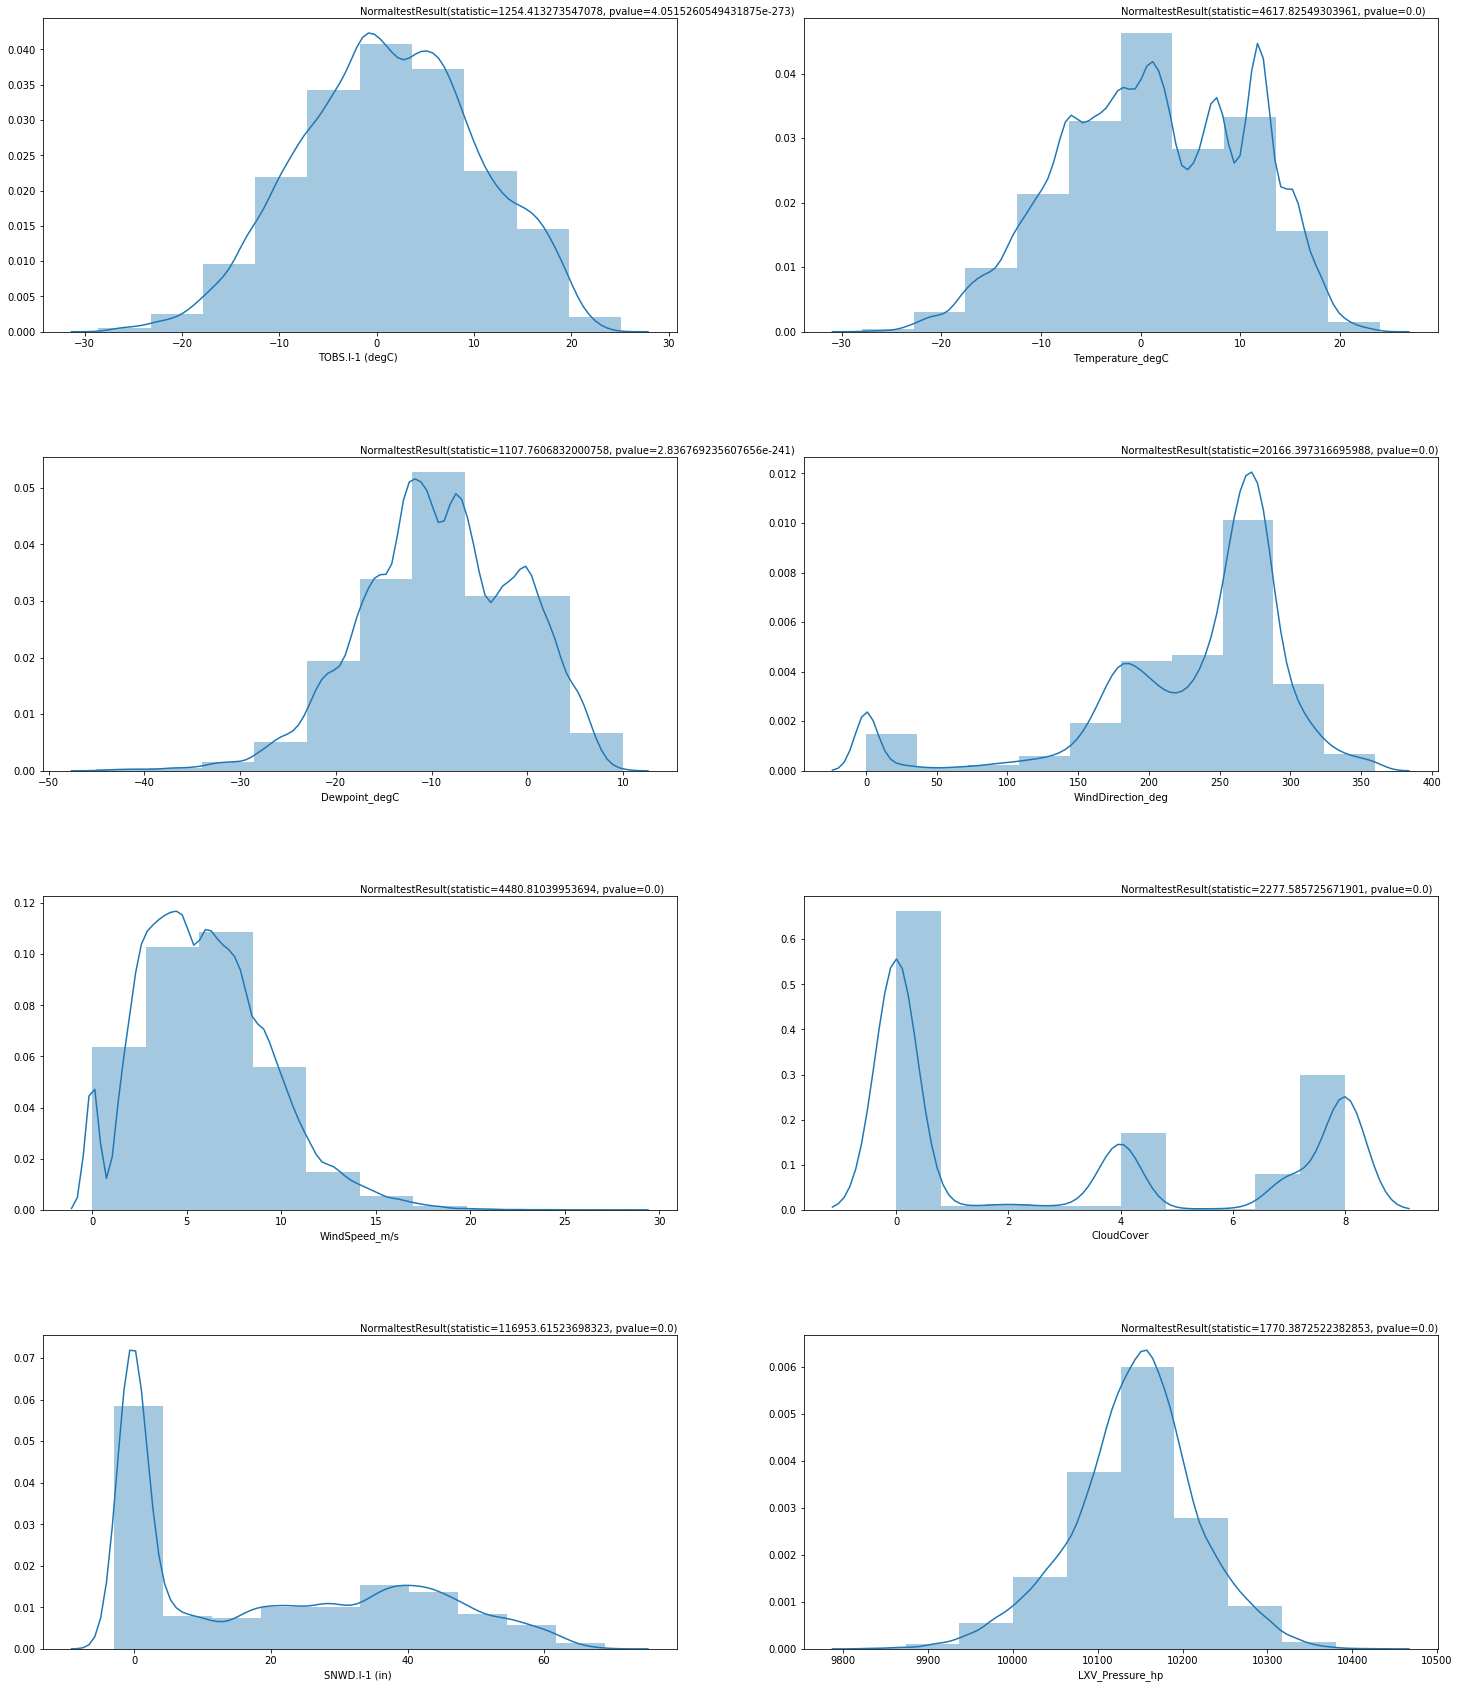

In [4]:
%matplotlib inline
from scipy import stats
from scipy.stats import mode
keys = ['TOBS.I-1 (degC) ','Temperature_degC', 'Dewpoint_degC', 'WindDirection_deg', 'WindSpeed_m/s', 'CloudCover', 'SNWD.I-1 (in) ', 'LXV_Pressure_hp']
years = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']




fig = plt.figure(figsize=(25,30))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
for k in range(len(keys)):
    ax = plt.subplot(4, 2, k+1)
    
    xx_df1 = asos_snotel_df[keys[k]][(asos_snotel_df[keys[k]].index.month >= 11) & \
                                                (asos_snotel_df[keys[k]].index.year == int(years[k]))].resample('12H').apply(lambda x: mode(x)[0][0]) #.reset_index()
    xx_df2 = asos_snotel_df[keys[k]][(asos_snotel_df[keys[k]].index.month <=  4) & \
                                               (asos_snotel_df[keys[k]].index.year == int(years[k])+1)].resample('12H').apply(lambda x: mode(x)[0][0])  #.resample('12H').mid()
                                                 
                                              #   wd_df1 = bin_wd_df2['WindDirection_deg'][(bin_wd_df2['WindDirection_deg'].index.month >= 11) & \
                                               # (bin_wd_df2['WindDirection_deg'].index.year == int(years[k]))].resample('12H').apply(lambda x: mode(x)[0][0])
    
    xx_df = pd.concat([xx_df1, xx_df2])
    
    norm = stats.normaltest( asos_snotel_df[keys[k]].dropna())
    x = pd.Series(asos_snotel_df[keys[k]].dropna(), name=keys[k])
    ax = sns.distplot(x, norm_hist = True, bins = 10)
    plt.annotate(str(norm),
                 xy=(0.5, 1.01), xycoords='axes fraction', fontsize=10)
                                      
    
    print()


----

----


## Check to see if there is linear relationship between meteorological variables and snowfall

**First calculate 12-snowfall column by finding difference between 12-hr snow depth observations**

In [5]:
fig = plt.figure(figsize=(10,5))

#Calculate 12-snowfall column by finding difference between 12-hr snow depth observations 
asos_snotel_df['12hr_SNWD_in'] = asos_snotel_df['SNWD.I-1 (in) '].resample('12H').last()
asos_snotel_df['12hr-SNOWFALL_in'] = asos_snotel_df['12hr_SNWD_in']-asos_snotel_df['12hr_SNWD_in'].shift(+12)


print(asos_snotel_df['12hr-SNOWFALL_in'].describe())

#print(asos_snotel_df['12hr-SNOWFALL_in']['12-16-2009':'12-19-2009'].head(500).dropna())
#print(asos_snotel_df['12hr-SNOWFALL_in']['12-16-2009':'12-19-2009'].shift(-12).head(500).dropna())
#print(asos_snotel_df['12hr_SNWD_in']['12-16-2009':'12-19-2009'].head(500).dropna())

count    7835.000000
mean       -0.001056
std         1.676344
min       -14.333333
25%        -1.000000
50%         0.000000
75%         1.000000
max        18.000000
Name: 12hr-SNOWFALL_in, dtype: float64


<Figure size 720x360 with 0 Axes>

**Make a quick plot to make sure the snowfall difference calc is doing what we think it is**

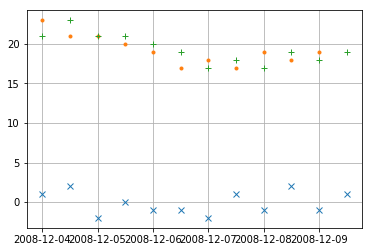

In [6]:
plt.plot(asos_snotel_df['12hr-SNOWFALL_in']['12-04-2008':'12-09-2008'], marker = 'x')
plt.plot(asos_snotel_df['12hr_SNWD_in']['12-04-2008':'12-09-2008'].shift(-12), marker = '.')
plt.plot(asos_snotel_df['12hr_SNWD_in']['12-04-2008':'12-09-2008'], marker = '+')
plt.grid()
plt.show()

**Plot Linear Regression plots**

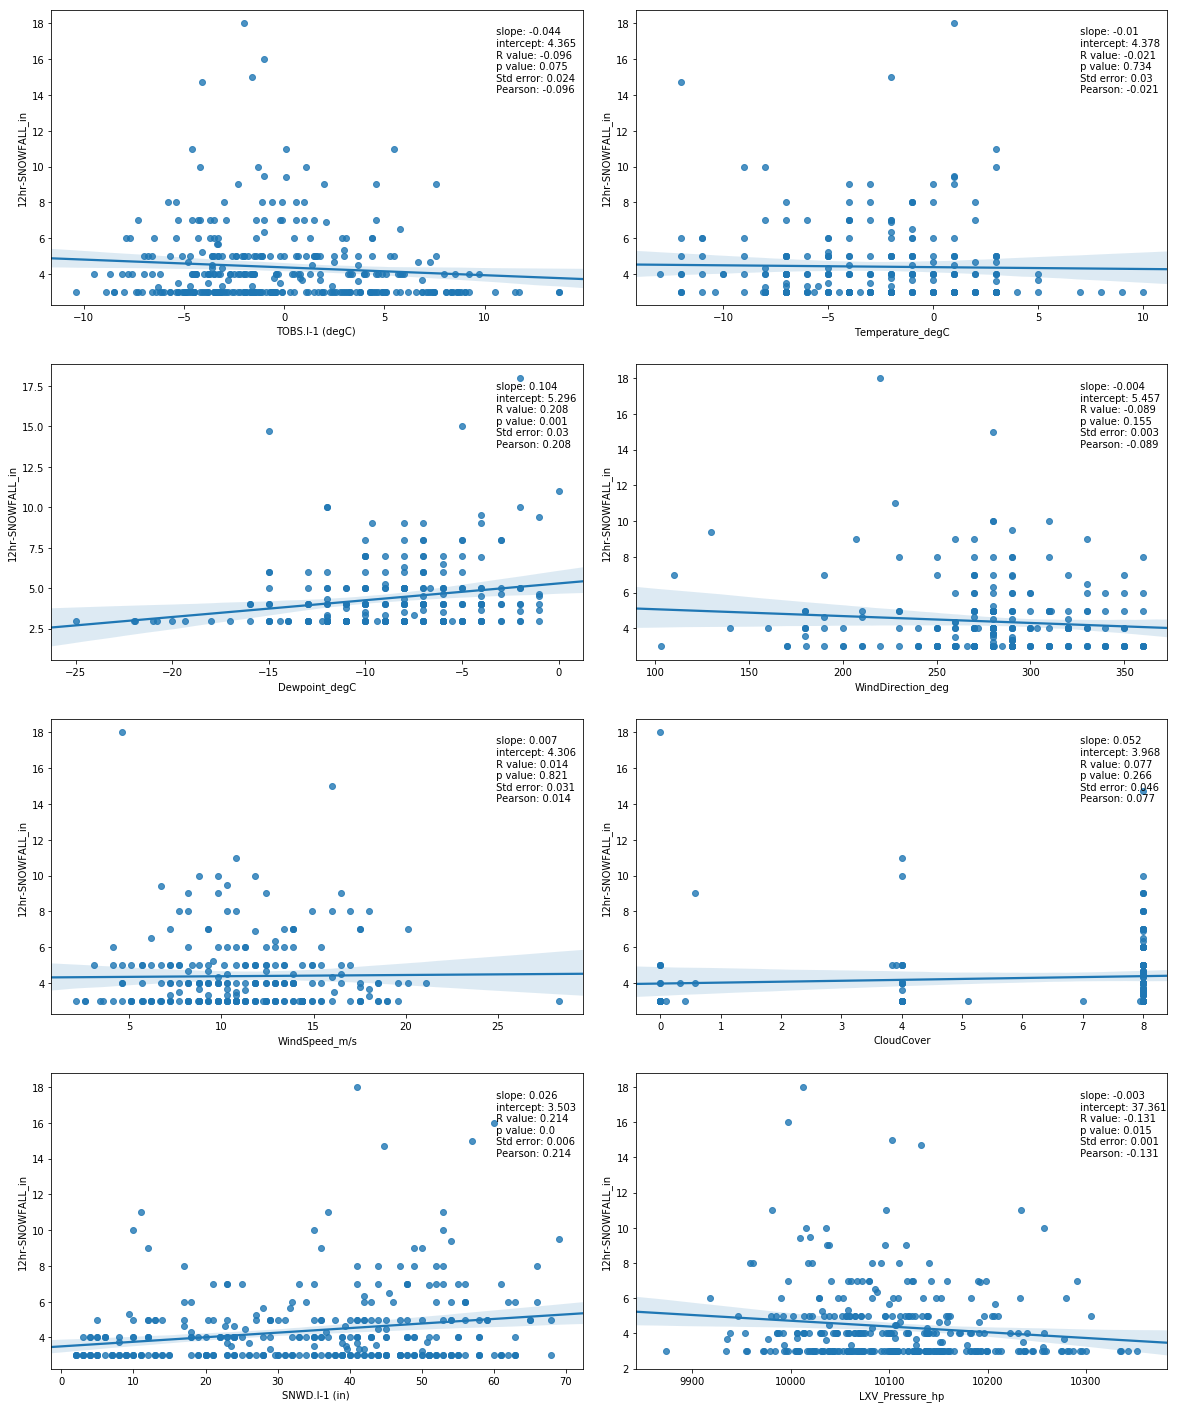

In [7]:
from scipy.stats import pearsonr, linregress

fig = plt.figure(figsize=(20,25))
fig.subplots_adjust(hspace=0.2, wspace=0.1)
yy = None
yy = (asos_snotel_df['12hr-SNOWFALL_in']>=3)
snf_df = asos_snotel_df['12hr-SNOWFALL_in'][yy]

#keys = ['TOBS.I-1 (degC) ', 'Dewpoint_degC', 'WindDirection_deg', 'WindSpeed_m/s', 'CloudCover', 'LAX_Pressure_hp' ]

for k in range(len(keys)):
    xx_df = None
    plt.subplot(4,2,k+1)

    xx_df = asos_snotel_df[keys[k]].resample('12H').max()

#print(ws_df, snf_df)

#snf_ws_df = pd.merge(sn, asos_filled_df, on='Date_Time', how='outer')
    idx = np.isfinite(xx_df) & np.isfinite(snf_df)
    sns.regplot(xx_df[idx], snf_df[idx])
    
    pearson, pv = pearsonr(xx_df[idx], snf_df[idx])
    #print(linregress(xx_df[idx], snf_df[idx]))
    slope, intercept, r_value, p_value, std_err = linregress(xx_df[idx], snf_df[idx])
    
    
    #plt.text(5,5,r'$\cos(2 \pi t) \exp(-t)$')
    #plt.text(0.5,0.5,'This is awesome! \n test' ,  bbox=dict(facecolor='red', alpha=0.5), transform=ax.transAxes)
    plt.annotate(' slope: ' + str(round(slope,3)) +
                 '\n intercept: ' + str(round(intercept,3)) + 
                 '\n R value: ' + str(round(r_value,3)) +  
                 '\n p value: ' + str(round(p_value,3)) + 
                 '\n Std error: ' + str(round(std_err,3)) +
                 '\n Pearson: ' + str(round(pearson,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=10)
                                      
#    print()
#    print(str(keys[k]))
#    print('slope: '+ str(slope))
#    print('intercept:')
plt.show()




**It does not appear that there is a nice linear relationship between temperature and snowfall.  There does appear to be somewhat of a relationshop with Dewpoint, so this will be investigated further. **

----


## Is there a linear relationship between ASOS temperatures and SNOTEL temperatures?

slope = 0.792474237407381
intercept = 0.04233033137117593
0.792474237407381 0.04233033137117593


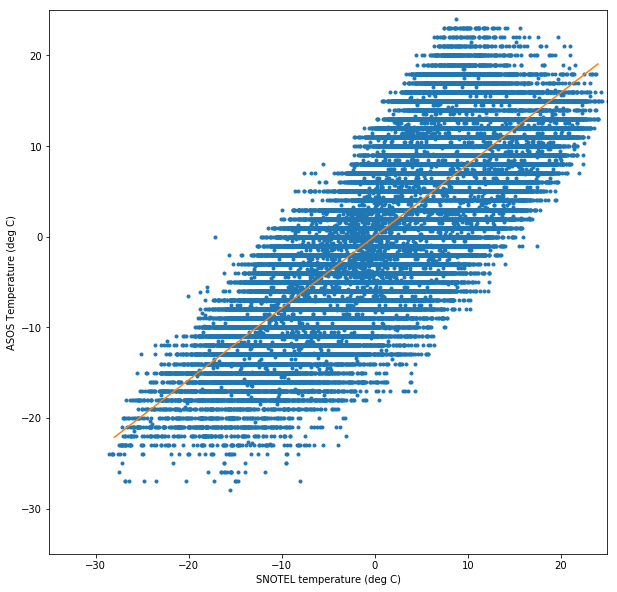

In [8]:
plt.figure(figsize=(10,10))

asos_temp_df=asos_snotel_df['Temperature_degC']
snotel_temp_df = asos_snotel_df['TOBS.I-1 (degC) ']



idx = np.isfinite(asos_temp_df) & np.isfinite(snotel_temp_df)

# Plot the snowfall vs temperature
_ = plt.plot(snotel_temp_df[idx], asos_temp_df[idx], marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.ylabel('ASOS Temperature (deg C)')
_ = plt.xlabel('SNOTEL temperature (deg C)')
_ = plt.xlim([-35, 25])
_ = plt.ylim([-35, 25])


# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(snotel_temp_df[idx], asos_temp_df[idx], 1)

# Print the results to the screen
print('slope =', a)
print('intercept =', b) 

print(a,b)

# Make theoretical line to plot
x = np.array([np.min(asos_temp_df[idx]),np.max(asos_temp_df[idx])])
y = a * x + b
_ = plt.plot(x, y)


# Relationship between Snowfall events and Meteorological Variables

## To begin, all meteorological variables must be reasonably binned

In [9]:
xx1 = asos_snotel_df[(asos_snotel_df.index.month >= 11) &  (asos_snotel_df.index.month <=  4)]

                                                 
                                              #   wd_df1 = bin_wd_df2['WindDirection_deg'][(bin_wd_df2['WindDirection_deg'].index.month >= 11) & \
                                               # (bin_wd_df2['WindDirection_deg'].index.year == int(years[k]))].resample('12H').apply(lambda x: mode(x)[0][0])
asos_snotel_winter_df = asos_snotel_df[xx1]

print( asos_snotel_df)

                     TOBS.I-1 (degC)   SNWD.I-1 (in)   Temperature_degC  \
Date_Time                                                                 
2006-01-01 01:00:00              -2.8            43.0              -1.0   
2006-01-01 02:00:00              -2.9            43.0              -3.0   
2006-01-01 03:00:00              -3.3            43.0              -4.0   
2006-01-01 04:00:00              -3.2            43.0              -4.0   
2006-01-01 05:00:00              -3.2            43.0              -5.0   
2006-01-01 06:00:00              -3.4            44.0              -6.0   
2006-01-01 07:00:00              -4.9            44.0              -5.0   
2006-01-01 08:00:00              -4.4            44.0              -5.0   
2006-01-01 09:00:00              -4.3            43.0              -6.0   
2006-01-01 10:00:00              -5.0            47.0              -6.0   
2006-01-01 11:00:00              -4.3            48.0              -7.0   
2006-01-01 12:00:00      

**Bin each variable in a consistent format resampling every 12H**

In [10]:
from scipy.stats import mode
def bin_df_data(df, bin_ranges):  
    binned_df = df.copy()
    binned_df[:] = np.NaN
    
    for t in range(1, len(bin_ranges)):
        binned_df[(df[:] >= bin_ranges[t-1]) & (df[:] < bin_ranges[t])] = (bin_ranges[t]+ bin_ranges[t-1])/2
    
    binned_df.columns = ['bin']
    return binned_df

#keys = ['Temperature_degC', 'Dewpoint_degC', 'TOBS.I-1 (degC) ']
#temp_range = [-40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10]

#Bin linear variables###############################################################
temp_range = [-40, -38, -36, -34, -32, -30, -28, -26, -24, -22, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40 ]
ws_range = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
bp_range = [9860, 9880, 9900, 9920, 9940, 9960, 9980, 10000, 10020, 10040, 10060, 10080, 10100, 10120, 10140, 10160, 10180, 10200, 10220, 10240, 10260, 10280, 10300, 10320, 10340, 10360, 10380, 10400]

binned_12H_Temp = bin_df_data(asos_snotel_df['Temperature_degC'].resample('12H').mean(), temp_range)
ASOStemp_bin_counts = binned_12H_Temp.groupby(binned_12H_Temp).size().reset_index(name='Counts')

binned_12H_TOBS = bin_df_data(asos_snotel_df['TOBS.I-1 (degC) '].resample('12H').mean(), temp_range)
SNOTELtemp_bin_counts = binned_12H_TOBS.groupby(binned_12H_TOBS).size().reset_index(name='Counts')

binned_12H_DP = bin_df_data(asos_snotel_df['Dewpoint_degC'].resample('12H').mean(), temp_range)
DP_bin_counts = binned_12H_DP.groupby(binned_12H_DP).size().reset_index(name= 'Counts')

binned_12H_WS = bin_df_data(asos_snotel_df['WindSpeed_m/s'].resample('12H').mean(), ws_range)
WS_bin_counts = binned_12H_WS.groupby(binned_12H_WS).size().reset_index(name='Counts')

binned_12H_P = bin_df_data(asos_snotel_df['LXV_Pressure_hp'].resample('12H').mean(), bp_range)
BP_bin_counts = binned_12H_P.groupby(binned_12H_P).size().reset_index(name='Counts')



## Bin Wind Direction########################################
bin_wd_df = pd.DataFrame()
binned_WD =  asos_snotel_df['WindDirection_deg'].copy()

binned_WD[(binned_WD >= 337.5) | (binned_WD < 22.5)] = 0
binned_WD[(binned_WD >= 22.5) & (binned_WD < 67.5)] = 45
binned_WD[(binned_WD >= 67.5) & (binned_WD < 112.5)] = 90
binned_WD[(binned_WD >= 112.5) & (binned_WD < 157.5)] = 135
binned_WD[(binned_WD >= 157.5) & (binned_WD < 202.5)] = 180
binned_WD[(binned_WD >= 202.5) & (binned_WD < 247.5)] = 225
binned_WD[(binned_WD >= 247.5) & (binned_WD < 292.5)] = 270
binned_WD[(binned_WD >= 292.5) & (binned_WD< 337.5)] = 315

binned_12H_WD = binned_WD.resample('12H').apply(lambda x: mode(x)[0])
binned_12H_WD = pd.to_numeric(binned_12H_WD, errors='coerce')


##Bin Snowfall########
binned_SNF = asos_snotel_df['12hr-SNOWFALL_in'].copy()
yy = (binned_SNF <3)
binned_SNF[yy] = np.NaN

binned_SNF[(binned_SNF >= 3.0) & (binned_SNF <5.5) ]= 4
binned_SNF[(binned_SNF >= 5.5) & (binned_SNF< 7.5)] = 6
binned_SNF[(binned_SNF >= 7.5) & (binned_SNF < 9.5)] = 8
binned_SNF[(binned_SNF >= 9.5)] = 10

binned_12H_SNF = binned_SNF.resample('12H').last()



##Put all data in individual dataframe
binned_df = None
binned_df = binned_12H_SNF.to_frame().join(binned_12H_Temp.to_frame(), on = 'Date_Time', how= 'outer') \
                                     .join(binned_12H_TOBS.to_frame(), on = 'Date_Time', how= 'outer')  \
                                     .join(binned_12H_DP.to_frame(), on = 'Date_Time', how= 'outer')  \
                                     .join(binned_12H_WS.to_frame(), on = 'Date_Time', how= 'outer')  \
                                     .join(binned_12H_WD.to_frame(), on = 'Date_Time', how= 'outer')  \
                                     .join(binned_12H_P.to_frame(), on = 'Date_Time', how= 'outer')  \

#print(binned_12H_Temp.head())
#print(binned_12H_TOBS.head())
#print(binned_12H_DP.head())
#print(binned_12H_WS.head())
#print(binned_12H_WD.head())
#print(binned_12H_P.head())
#print(binned_12H_SNF.head())

print(binned_df.head())


#      ...: fig = plt.figure( figsize =( 6,6))      ...: fig.add_subplot( gs[ 1,: 2])      ...: fig.add_subplot( gs[ 0,: 2])


#.hist(bin_temp_df['Temperature_degC'].dropna())
#plt.hist(bin_temp_df['Temperature_degC'].dropna(), bins=temp_range)
#plt.xlabel()
#plt.show()
 

                     12hr-SNOWFALL_in  Temperature_degC  TOBS.I-1 (degC)   \
Date_Time                                                                   
2006-01-01 00:00:00               NaN              -5.0              -3.0   
2006-01-01 12:00:00               NaN              -9.0              -7.0   
2006-01-02 00:00:00               NaN             -11.0              -9.0   
2006-01-02 12:00:00               NaN              -5.0               1.0   
2006-01-03 00:00:00               NaN              -3.0              -3.0   

                     Dewpoint_degC  WindSpeed_m/s  WindDirection_deg  \
Date_Time                                                              
2006-01-01 00:00:00           -9.0            5.0              225.0   
2006-01-01 12:00:00          -11.0            5.0              315.0   
2006-01-02 00:00:00          -15.0            5.0              225.0   
2006-01-02 12:00:00          -11.0            9.0              270.0   
2006-01-03 00:00:00         

**Plot variable vs counts**

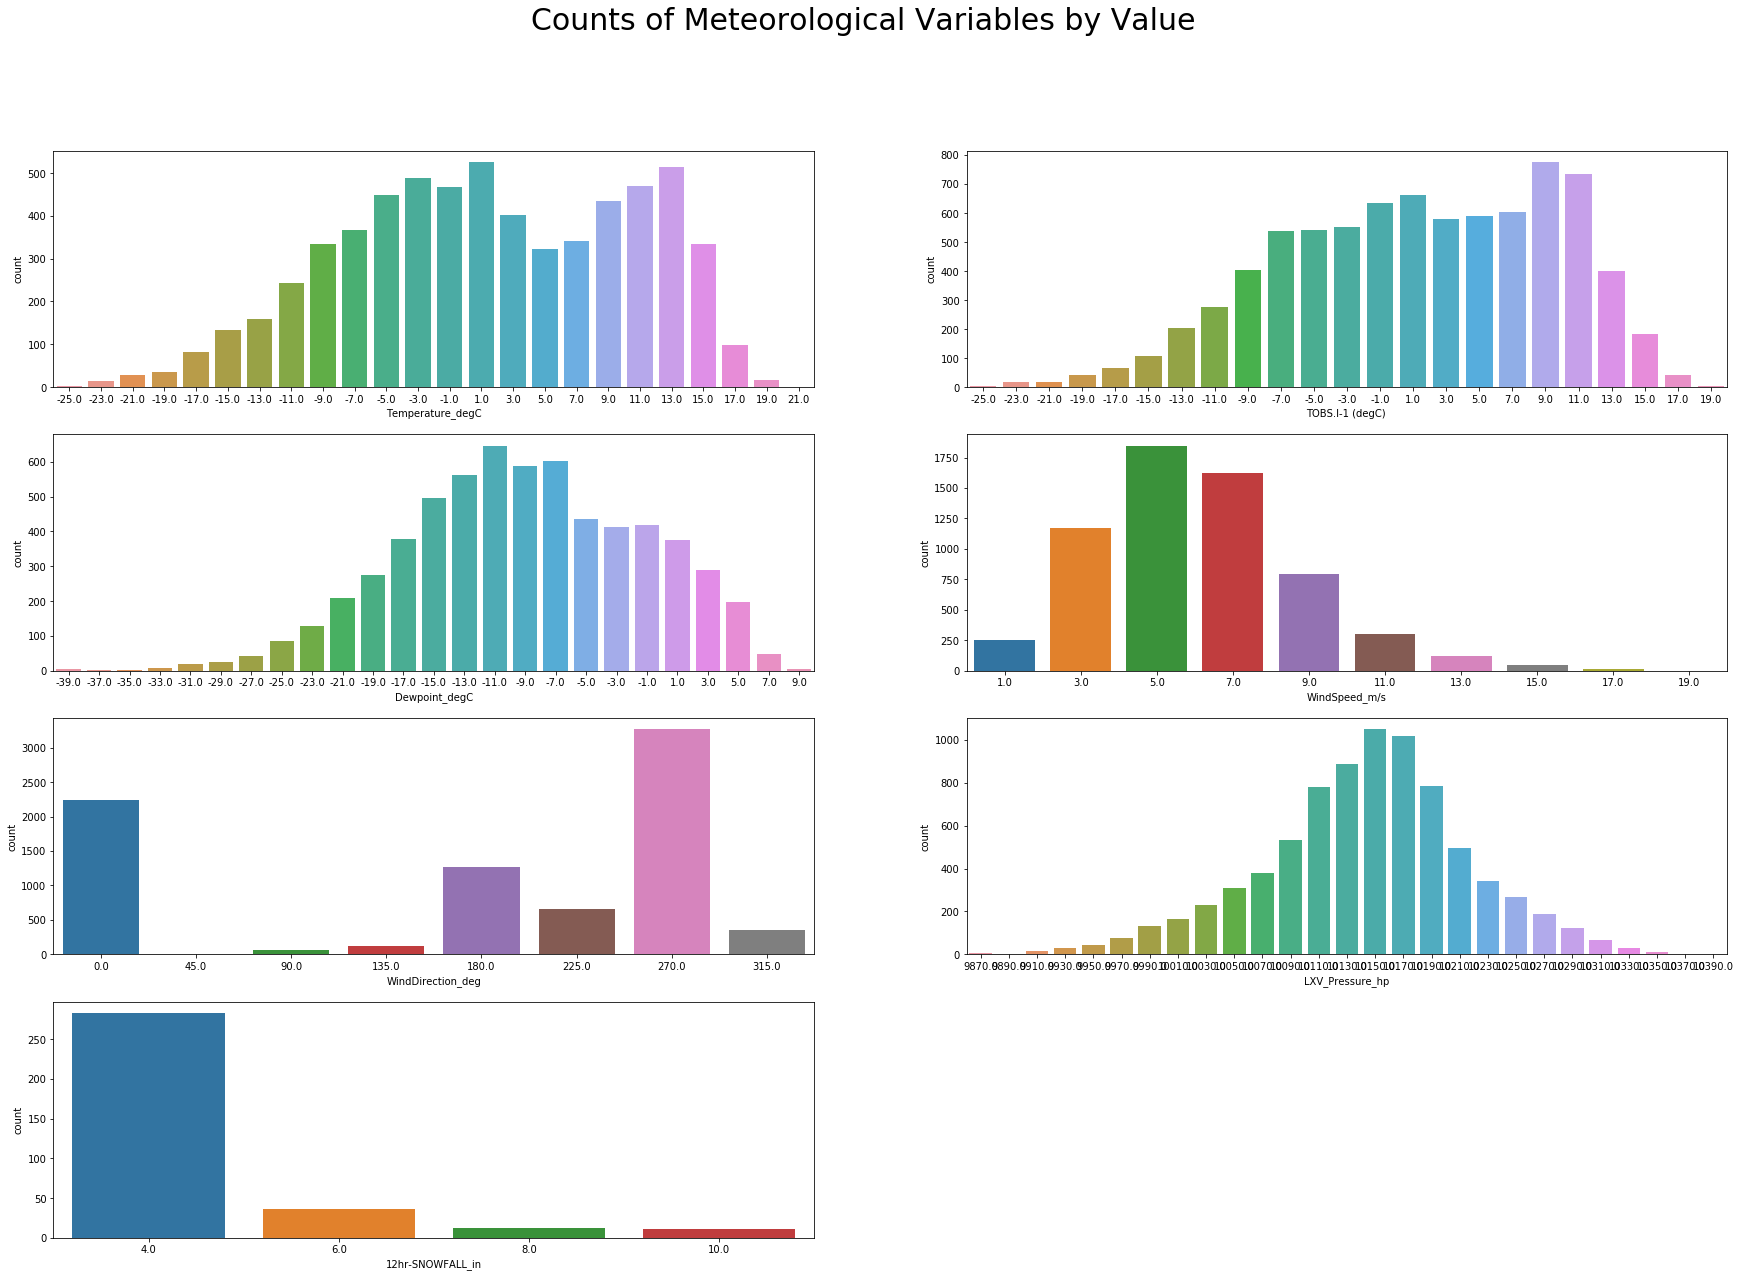

In [11]:
fig = plt.figure( figsize =(30,20)) 
fig.suptitle('Counts of Meteorological Variables by Value', fontsize=30)

fig.add_subplot(421)
sns.countplot(binned_df['Temperature_degC'])
fig.add_subplot(422)
sns.countplot(binned_df['TOBS.I-1 (degC) '])
fig.add_subplot(423)
sns.countplot(binned_df['Dewpoint_degC'])
fig.add_subplot(424)
sns.countplot(binned_df['WindSpeed_m/s'])
fig.add_subplot(425)
sns.countplot(binned_df['WindDirection_deg'])
fig.add_subplot(426)
sns.countplot(binned_df['LXV_Pressure_hp'])
fig.add_subplot(427)
sns.countplot(binned_df['12hr-SNOWFALL_in'])
plt.show()



**Plot variable vs actual snowfall totals for each bin**  
To do this, first add a column of actual snowfall totals to the bin dataframe to create a new dataframe for plotting

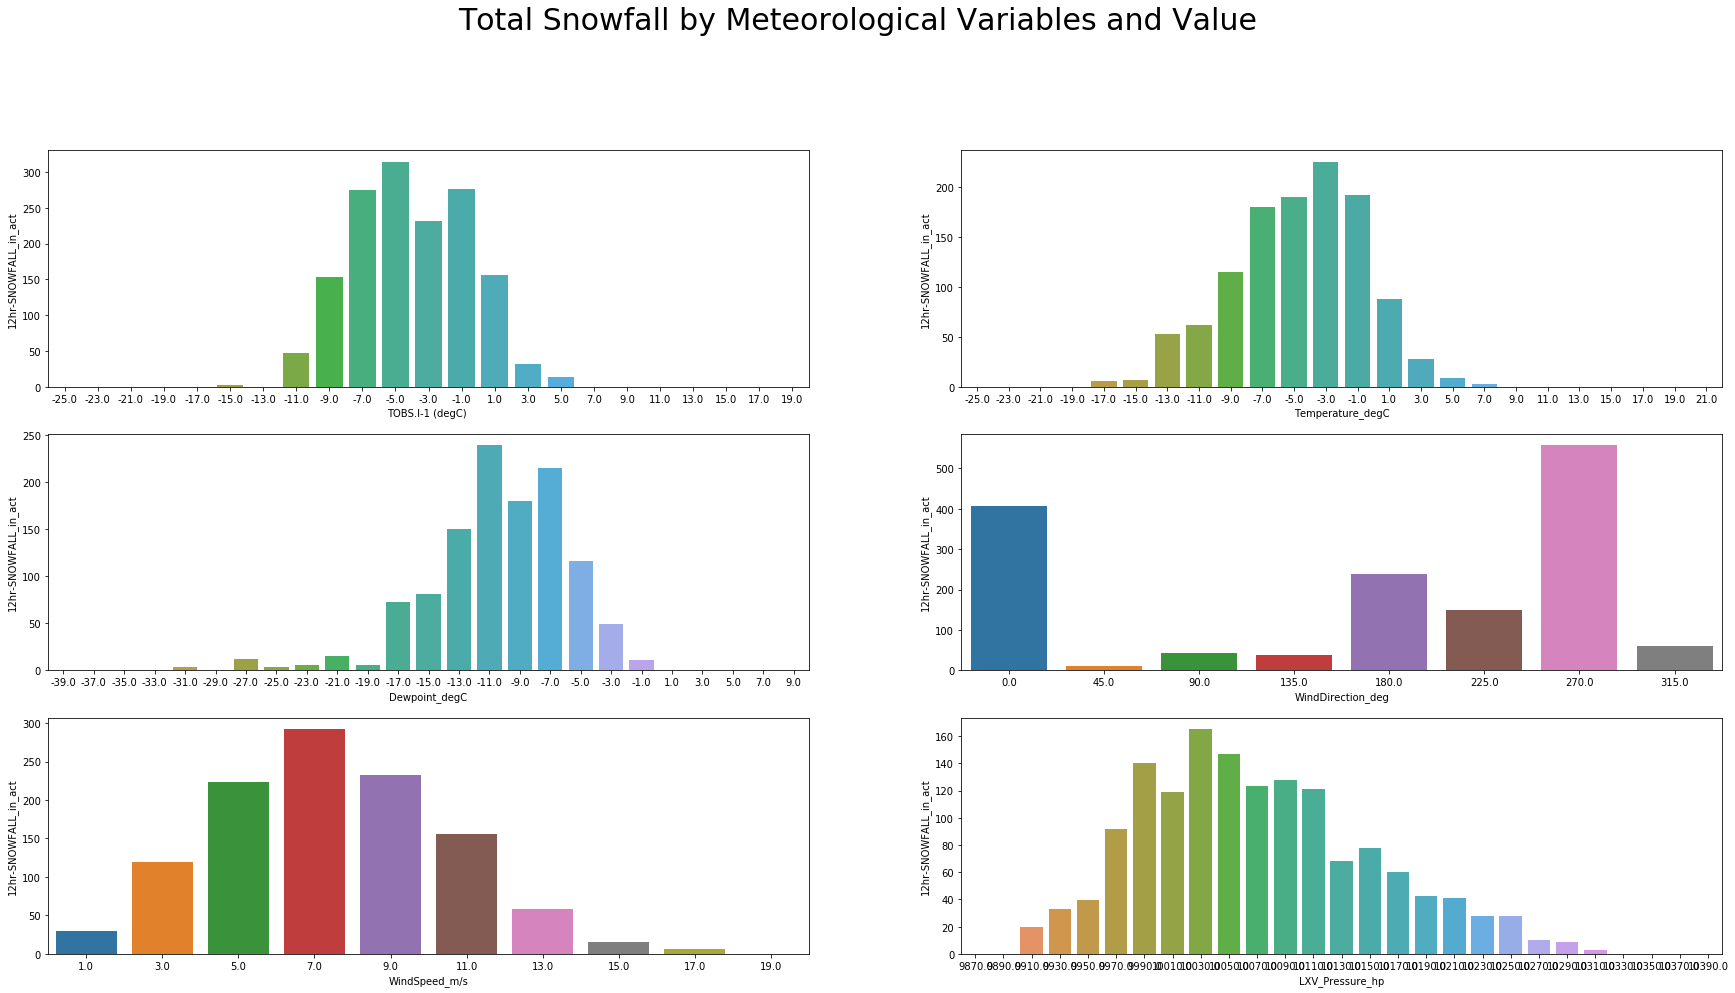

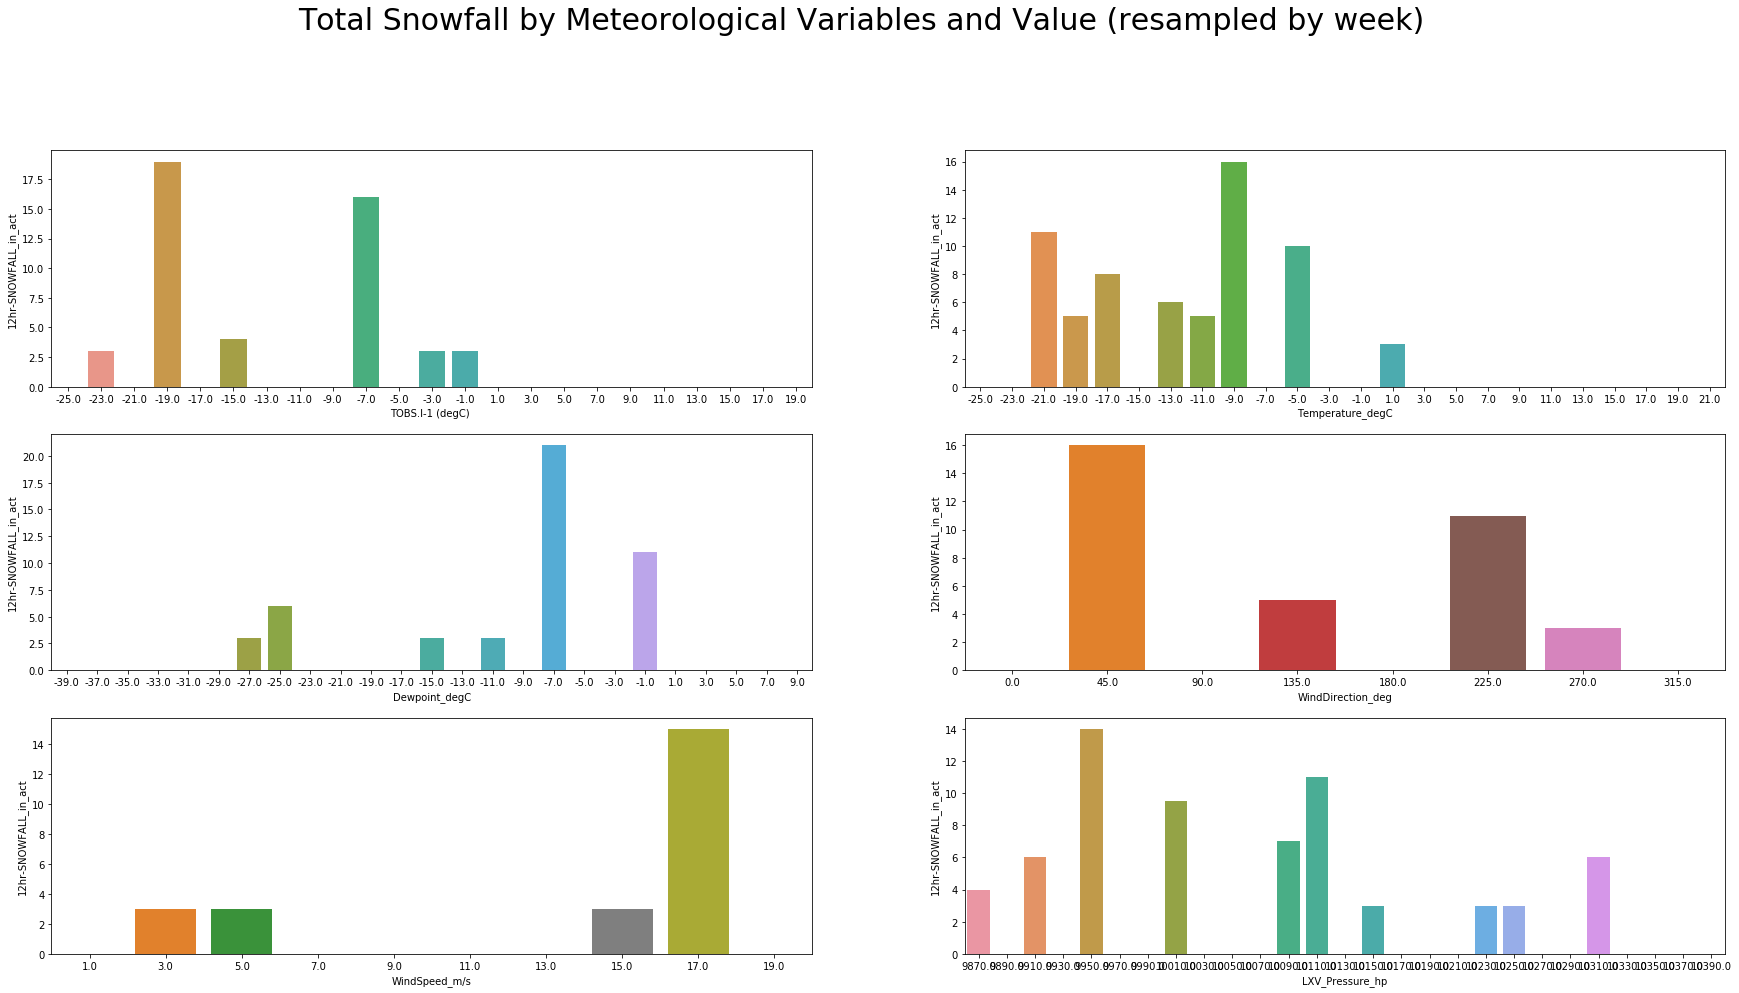

In [12]:
#add actual snowfall total column to binned_df
SNF = asos_snotel_df['12hr-SNOWFALL_in'].copy()
yy = (SNF <3)
SNF[yy] = np.NaN

df = binned_df.join(SNF.resample('12H').last(),on = 'Date_Time', how= 'outer', rsuffix = '_act')
df_wk = binned_df.join(SNF.resample('w').sum(),on = 'Date_Time', how= 'outer', rsuffix = '_act')

#df_wk = df.resample('w').mean()


#Plot
fig = plt.figure( figsize =(30,20)) 
fig.suptitle('Total Snowfall by Meteorological Variables and Value', fontsize=30)

keys = ['TOBS.I-1 (degC) ','Temperature_degC', 'Dewpoint_degC', 'WindDirection_deg', 'WindSpeed_m/s', 'LXV_Pressure_hp']

for k in range(len(keys)):
  fig.add_subplot(4,2,k+1)
  sns.barplot(df.groupby([keys[k]]).sum()['12hr-SNOWFALL_in_act'].index, df.groupby([keys[k]]).sum()['12hr-SNOWFALL_in_act'])
plt.show()

fig = plt.figure( figsize =(30,20))
fig.suptitle('Total Snowfall by Meteorological Variables and Value (resampled by week)', fontsize=30)
for k in range(len(keys)):
  fig.add_subplot(4,2,k+1)
  sns.barplot(df_wk.groupby([keys[k]]).last()['12hr-SNOWFALL_in_act'].index, df_wk.groupby([keys[k]]).last()['12hr-SNOWFALL_in_act'])
plt.show()


**Plot snowfall data resampled by week**

<Figure size 2160x360 with 0 Axes>

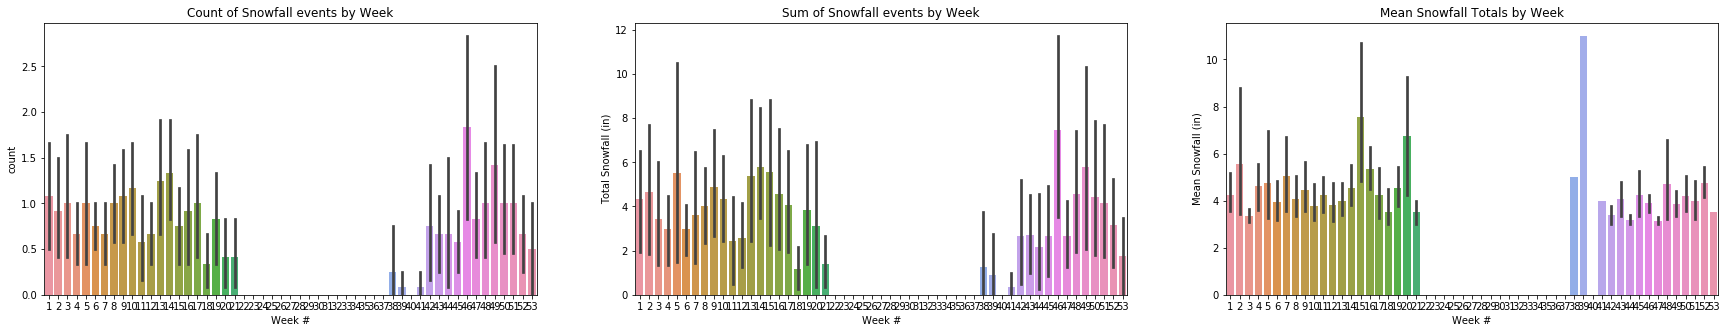

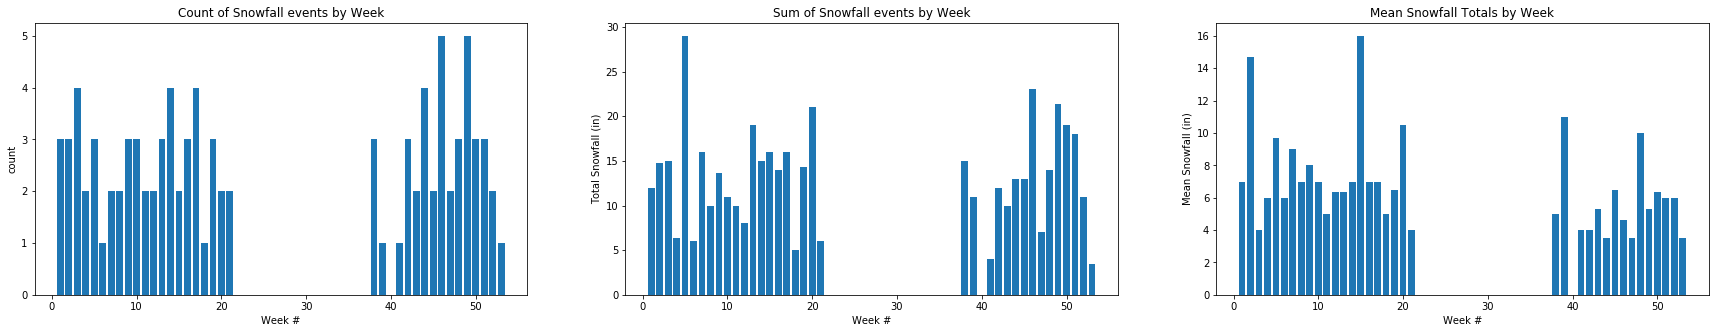

In [13]:
#add actual snowfall total column to binned_df
SNF = asos_snotel_df['12hr-SNOWFALL_in'].copy()
yy = (SNF <3)
SNF[yy] = np.NaN

df = binned_df.join(SNF.resample('12H').last(),on = 'Date_Time', how= 'outer', rsuffix = '_act')


#Plot
fig = plt.figure( figsize =(30,5)) 

snf_df_count = df['12hr-SNOWFALL_in_act'].resample('w').count()
snf_df_sum = df['12hr-SNOWFALL_in_act'].resample('w').sum()
snf_df_mean = df['12hr-SNOWFALL_in_act'].resample('w').mean()


fig = plt.figure( figsize =(30,5)) 

fig.add_subplot(1,3,1)
plt.title('Count of Snowfall events by Week')
sns.barplot(snf_df_count.index.week, snf_df_count)
plt.xlabel('Week #')
plt.ylabel('count')

fig.add_subplot(1,3,2)
plt.title('Sum of Snowfall events by Week')
sns.barplot(snf_df_sum.index.week, snf_df_sum)
plt.xlabel('Week #')
plt.ylabel('Total Snowfall (in)')

fig.add_subplot(1,3,3)
plt.title('Mean Snowfall Totals by Week')
sns.barplot(snf_df_mean.index.week, snf_df_mean)
plt.xlabel('Week #')
plt.ylabel('Mean Snowfall (in)')

plt.show()





##Using plt.bar 
fig = plt.figure( figsize =(30,5)) 
fig.add_subplot(1,3,1)
plt.title('Count of Snowfall events by Week')
plt.bar(snf_df_count.index.week, snf_df_count)
plt.xlabel('Week #')
plt.ylabel('count')

fig.add_subplot(1,3,2)
plt.title('Sum of Snowfall events by Week')
plt.bar(snf_df_sum.index.week, snf_df_sum)
plt.xlabel('Week #')
plt.ylabel('Total Snowfall (in)')

fig.add_subplot(1,3,3)
plt.title('Mean Snowfall Totals by Week')
plt.bar(snf_df_mean.index.week, snf_df_mean)
plt.xlabel('Week #')
plt.ylabel('Mean Snowfall (in)')

plt.show()

**Plot snowfall data by month**

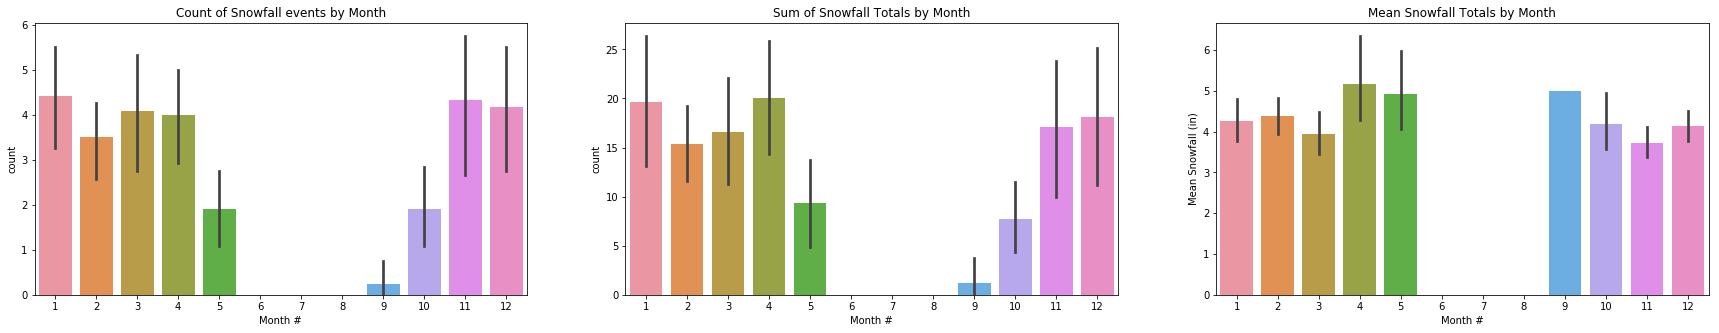

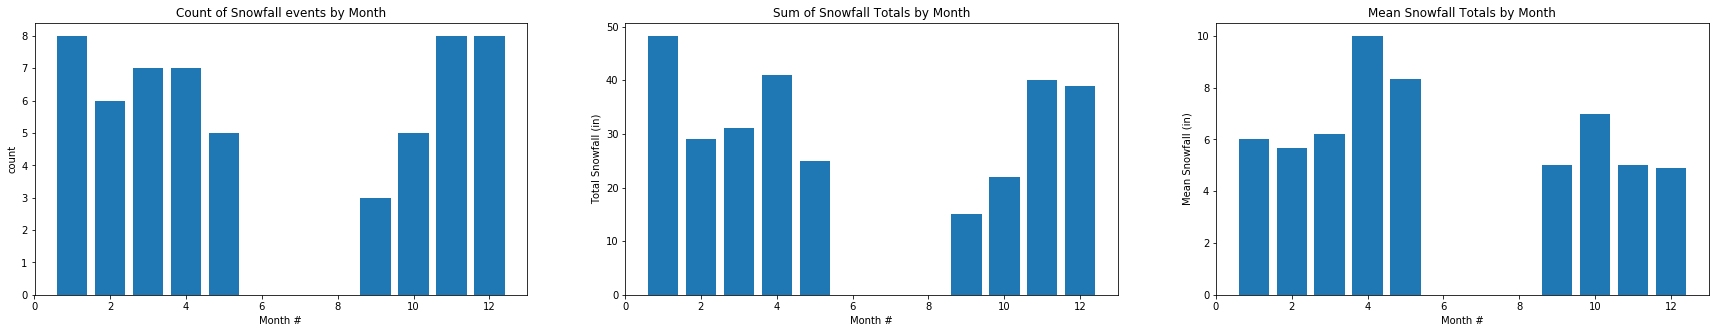

In [16]:
fig = plt.figure( figsize =(30,5)) 

snf_df_count = df['12hr-SNOWFALL_in_act'].resample('m').count()
snf_df_sum = df['12hr-SNOWFALL_in_act'].resample('m').sum()
snf_df_mean = df['12hr-SNOWFALL_in_act'].resample('m').mean()

fig.add_subplot(1,3,1)
plt.title('Count of Snowfall events by Month')
sns.barplot(snf_df_count.index.month, snf_df_count)
plt.xlabel('Month #')
plt.ylabel('count')

fig.add_subplot(1,3,2)
plt.title('Sum of Snowfall Totals by Month')
sns.barplot(snf_df_sum.index.month, snf_df_sum)
plt.xlabel('Month #')
plt.ylabel('count')

fig.add_subplot(1,3,3)
plt.title('Mean Snowfall Totals by Month')
sns.barplot(snf_df_mean.index.month, snf_df_mean)
plt.xlabel('Month #')
plt.ylabel('Mean Snowfall (in)')

plt.show()



#Using plt.bar
fig = plt.figure( figsize =(30,5)) 

snf_df_count = df['12hr-SNOWFALL_in_act'].resample('m').count()
snf_df_sum = df['12hr-SNOWFALL_in_act'].resample('m').sum()
snf_df_mean = df['12hr-SNOWFALL_in_act'].resample('m').mean()

fig.add_subplot(1,3,1)
plt.title('Count of Snowfall events by Month')
plt.bar(snf_df_count.index.month, snf_df_count)
plt.xlabel('Month #')
plt.ylabel('count')

fig.add_subplot(1,3,2)
plt.title('Sum of Snowfall Totals by Month')
plt.bar(snf_df_sum.index.month, snf_df_sum)
plt.xlabel('Month #')
plt.ylabel('Total Snowfall (in)')

fig.add_subplot(1,3,3)
plt.title('Mean Snowfall Totals by Month')
plt.bar(snf_df_mean.index.month, snf_df_mean)
plt.xlabel('Month #')
plt.ylabel('Mean Snowfall (in)')

plt.show()

In [ ]:
from scipy.stats import mode
def bin_df_data(df, bin_ranges):  
    binned_df = df.copy()
    binned_df[:] = np.NaN
    
    for t in range(1, len(bin_ranges)):
        binned_df[(df[:] >= bin_ranges[t-1]) & (df[:] < bin_ranges[t])] = (bin_ranges[t]+ bin_ranges[t-1])/2
    
    binned_df.columns = ['bin']
    return binned_df

#keys = ['Temperature_degC', 'Dewpoint_degC', 'TOBS.I-1 (degC) ']
#temp_range = [-40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10]

#Bin linear variables###############################################################
temp_range = [-40, -38, -36, -34, -32, -30, -28, -26, -24, -22, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40 ]
ws_range = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
bp_range = [9860, 9880, 9900, 9920, 9940, 9960, 9980, 10000, 10020, 10040, 10060, 10080, 10100, 10120, 10140, 10160, 10180, 10200, 10220, 10240, 10260, 10280, 10300, 10320, 10340, 10360, 10380, 10400]

binned_12H_Temp = bin_df_data(asos_snotel_df['Temperature_degC'].resample('w').mean(), temp_range)
ASOStemp_bin_counts = binned_12H_Temp.groupby(binned_12H_Temp).size().reset_index(name='Counts')

binned_12H_TOBS = bin_df_data(asos_snotel_df['TOBS.I-1 (degC) '].resample('1w').mean(), temp_range)
SNOTELtemp_bin_counts = binned_12H_TOBS.groupby(binned_12H_TOBS).size().reset_index(name='Counts')

binned_12H_DP = bin_df_data(asos_snotel_df['Dewpoint_degC'].resample('w').mean(), temp_range)
DP_bin_counts = binned_12H_DP.groupby(binned_12H_DP).size().reset_index(name= 'Counts')

binned_12H_WS = bin_df_data(asos_snotel_df['WindSpeed_m/s'].resample('w').mean(), ws_range)
WS_bin_counts = binned_12H_WS.groupby(binned_12H_WS).size().reset_index(name='Counts')

binned_12H_P = bin_df_data(asos_snotel_df['LXV_Pressure_hp'].resample('w').mean(), bp_range)
BP_bin_counts = binned_12H_P.groupby(binned_12H_P).size().reset_index(name='Counts')



## Bin Wind Direction########################################
bin_wd_df = pd.DataFrame()
binned_WD =  asos_snotel_df['WindDirection_deg'].copy()

binned_WD[(binned_WD >= 337.5) | (binned_WD < 22.5)] = 0
binned_WD[(binned_WD >= 22.5) & (binned_WD < 67.5)] = 45
binned_WD[(binned_WD >= 67.5) & (binned_WD < 112.5)] = 90
binned_WD[(binned_WD >= 112.5) & (binned_WD < 157.5)] = 135
binned_WD[(binned_WD >= 157.5) & (binned_WD < 202.5)] = 180
binned_WD[(binned_WD >= 202.5) & (binned_WD < 247.5)] = 225
binned_WD[(binned_WD >= 247.5) & (binned_WD < 292.5)] = 270
binned_WD[(binned_WD >= 292.5) & (binned_WD< 337.5)] = 315

binned_12H_WD = binned_WD.resample('12H').apply(lambda x: mode(x)[0])
binned_12H_WD = pd.to_numeric(binned_12H_WD, errors='coerce')


##Bin Snowfall########
binned_SNF = asos_snotel_df['12hr-SNOWFALL_in'].resample('w').mean().copy()
yy = (binned_SNF <3)
binned_SNF[yy] = np.NaN

binned_SNF[(binned_SNF >= 3.0) & (binned_SNF <5.5) ]= 4
binned_SNF[(binned_SNF >= 5.5) & (binned_SNF< 7.5)] = 6
binned_SNF[(binned_SNF >= 7.5) & (binned_SNF < 9.5)] = 8
binned_SNF[(binned_SNF >= 9.5)] = 10

binned_12H_SNF = binned_SNF.resample('12H').last()



##Put all data in individual dataframe
wk_binned_df = None
wk_binned_df = binned_12H_SNF.to_frame().join(binned_12H_Temp.to_frame(), on = 'Date_Time', how= 'outer') \
                                     .join(binned_12H_TOBS.to_frame(), on = 'Date_Time', how= 'outer')  \
                                     .join(binned_12H_DP.to_frame(), on = 'Date_Time', how= 'outer')  \
                                     .join(binned_12H_WS.to_frame(), on = 'Date_Time', how= 'outer')  \
                                     .join(binned_12H_WD.to_frame(), on = 'Date_Time', how= 'outer')  \
                                     .join(binned_12H_P.to_frame(), on = 'Date_Time', how= 'outer')  \

#print(binned_12H_Temp.head())
#print(binned_12H_TOBS.head())
#print(binned_12H_DP.head())
#print(binned_12H_WS.head())
#print(binned_12H_WD.head())
#print(binned_12H_P.head())
#print(binned_12H_SNF.head())

print(wk_binned_df.head())


#      ...: fig = plt.figure( figsize =( 6,6))      ...: fig.add_subplot( gs[ 1,: 2])      ...: fig.add_subplot( gs[ 0,: 2])


#.hist(bin_temp_df['Temperature_degC'].dropna())
#plt.hist(bin_temp_df['Temperature_degC'].dropna(), bins=temp_range)
#plt.xlabel()
#plt.show()
 

## Wind Direction vs Snowfall Analysis

**Plot wind speed, wind direction and snowfall together on polar plot**

In [ ]:
ws_df = None
ws_df1 = None
ws_df2 = None
wd_df1 = None
wd_df2 = None
wd_df = None
df = None
df_all = None
areas = None


df_all = pd.DataFrame()



years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


from scipy.stats import mode




fig = plt.figure(figsize=(25,30))
fig.subplots_adjust(hspace=0.4, wspace=0.1)
for k in range(len(years)):
    #print(str(int(years[k])+1))
    #plt.subplot(4, 3, k+1)
    
    wd_df1 = binned_df['WindDirection_deg'][(binned_df['WindDirection_deg'].index.month >= 11) & \
                                                (binned_df['WindDirection_deg'].index.year == int(years[k]))].resample('12H').apply(lambda x: mode(x)[0][0]) #.reset_index()
    wd_df2 = binned_df['WindDirection_deg'][(binned_df['WindDirection_deg'].index.month <= 4) & \
                                               (binned_df['WindDirection_deg'].index.year == int(years[k])+1)].resample('12H').apply(lambda x: mode(x)[0][0])  #.resample('12H').mid()
    
    wd_df = pd.concat([wd_df1, wd_df2])
  
    
    
    
    ws_df1 = binned_df['WindSpeed_m/s'][(binned_df['WindSpeed_m/s'].index.month >= 11) & \
                                                (binned_df['WindSpeed_m/s'].index.year == int(years[k]))].resample('12H').mean().round()  #reset_index()
    ws_df2 = binned_df['WindSpeed_m/s'][(binned_df['WindSpeed_m/s'].index.month <= 4) & \
                                                (binned_df['WindSpeed_m/s'].index.year == int(years[k])+1)].resample('12H').mean().round()  #.resample('12H').mid()
    
    ws_df = pd.concat([ws_df1, ws_df2])
    
    
    snf_rs1 = binned_df[(binned_df['12hr-SNOWFALL_in'].index.month >= 11) & (binned_df['12hr-SNOWFALL_in'].index.year == int(years[k]))]
    snf_rs2 = binned_df[(binned_df['12hr-SNOWFALL_in'].index.month <= 4) & (binned_df['12hr-SNOWFALL_in'].index.year == int(years[k])+1)]
    #snf_rs =snf_rs1.to_frame().join(snf_rs2.to_frame(), right_index=True, left_index=True,how='outer').resample('1H').interpolate(limit=12).resample('H', how = 'min')
    snf_rs = pd.concat([snf_rs1, snf_rs2])
    print(snf_rs)



  
    df1 = wd_df.to_frame().merge(ws_df.to_frame(), right_index=True, left_index=True,how='outer')
    df = df1.merge(snf_rs, right_index=True, left_index=True,how='outer')

    #df_all = pd.concat([df_all, df])
   # print(df.head())

    
    areas = df.groupby(['WindDirection_deg', 'WindSpeed_m/s', '12hr-SNOWFALL_bin']).size().reset_index(name='counts')
 
 
    ax = fig.add_subplot(4, 3, k+1, projection='polar')
  
    #ax.bar(df['WindDirection_deg'], df['12hr-SNOWFALL'], normed=True, bins=np.arange(3, 18, 3), opening=0.8, edgecolor='white')
    #ax.scatter(df['WindDirection_deg'], df['12hr-SNOWFALL'])
   
    
    #categories = np.unique(df['12hr-SNOWFALL_bin'])
    #colors = np.linspace(0, 1, len(categories))
    #colordict = dict(zip(categories, colors))
    #df["Color"] = df[catcol].apply(lambda x: colordict[x])
    
    #plt.scatter(x, y, s=areas * 3, alpha=0.5)
    ax.scatter(np.radians(areas['WindDirection_deg']), areas['WindSpeed_m/s'], s = areas['counts']*100, c = areas['12hr-SNOWFALL_bin'], cmap='rainbow_r', vmin=3, vmax=10, alpha = 0.55)
    #ax.bar(df['WindDirection_deg'], df['WindSpeed_m/s'])
    #ax.contour(df['WindDirection_deg'], df['WindSpeed_m/s'], bins=np.arange(3, 18, 5), normed=True, lw=3)
   #plt.ylabel("% of occurence")
    plt.title("Ski Season Snowfall by Wind Direction: "+ str(int(years[k])-1) + "-"+ years[k])

    
   # ax.set_legend(title = 'Snowfall (inches)')
plt.show()
    
    
    #plt.scatter(areas['WindDirection_deg'][g1], areas['WindSpeed_m/s'][g1], s = areas['counts'][g1]*100, alpha = 0.25)
    #plt.show()

#print(df[df['12hr-SNOWFALL_bin'] != np.NaN])
aa = df_all['12hr-SNOWFALL_bin'] >0
print(aa)

print(df_all[aa])


          



**Make a plot with no ski season dependence**

In [ ]:
def rand_jitter(arr):
    stdev = arr.max()/100.
    return arr + np.random.randn(len(arr)) * stdev
sns.set_style('darkgrid')

areas_all = df_all.groupby(['WindDirection_deg', 'WindSpeed_m/s', '12hr-SNOWFALL_bin']).size().reset_index(name='counts')
print(areas_all)
fig2 = plt.figure(figsize=(15,20))
fig2.subplots_adjust(hspace=0.4, wspace=0.1)

ax2 = fig2.add_subplot(1, 1, 1, projection='polar')

ax2.scatter(np.radians(rand_jitter(areas_all['WindDirection_deg'])), rand_jitter(areas_all['WindSpeed_m/s']), s = areas_all['counts']**2*10, c = areas_all['12hr-SNOWFALL_bin'], cmap='Reds', vmin=2, vmax=8, alpha = 1)

plt.title("Ski Season Snowfall by Wind Direction")
plt.show()




In [ ]:
wd_bin_counts = df_all.dropna().groupby(['WindDirection_deg', '12hr-SNOWFALL_bin']).size().reset_index(name='counts')
wd_bin_counts2 = wd_bin_counts.groupby(['WindDirection_deg']).agg(['sum'])
print(wd_bin_counts)
print(wd_bin_counts2) 
##

from scipy.stats import chisquare
cs, pv = chisquare(wd_bin_counts2['counts'], wd_bin_counts2['counts'].mean())

print('The chi square test tests the null hypothesis that the categorical data has the given frequencies.')
print(f'Chi-square Statistic : {cs} ,p-value: {pv}')


In [ ]:
plt.bar(wd_bin_counts['WindDirection_deg'], wd_bin_counts['counts'])
plt.show()

In [ ]:
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
from scipy import interpolate

counts = wd_bin_counts2['counts']

print(counts.head())
plt.figure(figsize=(20,10))
def simulate_poisson(counts):
    # Mean is 1.69
    mu = counts.mean()
    print(mu)
    sigma = sp.sqrt(mu)
    print(sigma)
    mu_plus_sigma = mu + sigma

    # Draw random samples from the Poisson distribution, to simulate
    # the observed events per 2 second interval.
    counts = stats.poisson.rvs(mu, size=10000)

    # Bins for the histogram: only the last bin is closed on both
    # sides. We need one more bin than the maximum value of count, so
    # that the maximum value goes in its own bin instead of getting
    # added to the previous bin.
    # [0,1), [1, 2), ..., [max(counts), max(counts)+1]
    bins = range(0, max(counts)+2)

    # Plot histogram.
    plt.hist(counts, bins=bins, align="left", histtype="step", color="black")

    # Create Poisson distribution for given mu.
    x = range(0,100)
    prob = stats.poisson.pmf(x, mu)*10000

    # Plot the PMF.
    plt.plot(x, prob, "o", color="black")

    # Draw a smooth curve through the PMF.
    l = sp.linspace(0,51,10000)
    s = interpolate.spline(x, prob, l)
    plt.plot(l,s,color="black")

    plt.xlabel("Number of counts per 2 seconds")
    plt.ylabel("Number of occurrences (Poisson)")

    # Interpolated probability at x = μ + σ; for marking σ in the graph.
   # xx = sp.searchsorted(l,mu_plus_sigma) - 1
    #v = ((s[xx+1] -  s[xx])/(l[xx+1]-l[xx])) * (mu_plus_sigma - l[xx])
    #v += s[xx]

    #ax = plt.gca()
    # Reset axis range and ticks.
    #ax.axis([-0.5,10, 0, 40])
    #ax.set_xticks(range(1,10), minor=True)
    #ax.set_yticks(range(0,41,8))
    #ax.set_yticks(range(4,41,8), minor=True)

    # Draw arrow and then place an opaque box with μ in it.
    #ax.annotate("", xy=(mu,29), xycoords="data", xytext=(mu, 13),
    #            textcoords="data", arrowprops=dict(arrowstyle="->",
    #                                               connectionstyle="arc3"))
    #bbox_props = dict(boxstyle="round", fc="w", ec="w")
    #ax.text(mu, 21, r"$\mu$", va="center", ha="center",
     #       size=15, bbox=bbox_props)

    # Draw arrow and then place an opaque box with σ in it.
    #x.annotate("", xy=(mu,v), xytext=(mu_plus_sigma,v),
    #            arrowprops=dict(arrowstyle="<->", connectionstyle="arc3"))
    #box_props = dict(boxstyle="round", fc="w", ec="w")
    #ax.text(mu+(sigma/2.0), v, r"$\sigma$", va="center", ha="center",
     #       size=15, bbox=bbox_props)

    # Refresh plot and save figure.
    #plt.draw()
#    plt.savefig("simulate_poisson.png")

simulate_poisson(counts)